<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
html_content = """
  <html>
  <head>
    <title>Scrap</title>
  </head>
  <body>
    <table>
      <thead>
        <tr>
          <td>Alfreds Futterkiste</td>
          <td>Maria Anders</td>
          <td>Germany</td>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td>1 Centro comercial Moctezuma</td>
          <td>1 Francisco Chang</td>
          <td>1 Mexico</td>
        </tr>
        <tr>
          <td>2 Centro comercial Moctezuma</td>
          <td>2 Francisco Chang</td>
          <td>2 Mexico</td>
        </tr>
      </tbody>
    </table>
  </body>
  </html>
"""

In [2]:
html_content2 = """
  <html><head>
    <title>Scrap</title>
  </head>
  <body>
    <div class="content">
      <p class="first p">This is First P tag</p>
      <p class="second p">This is Second P tag</p>
      
      <a href="https://nados.pepcoding.com%22 id="nados-link">go to nados</a><a href="https://pepcoding.com%22 id="pepcoding-link">go to pepcoding</a></div><a href="pepcoding.com" id="pepcoding-link">
  
  
          </a></body></html>
"""

In [8]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [12]:
bs=BeautifulSoup(html_content2)

In [16]:
bs


<html><head>
<title>Scrap</title>
</head>
<body>
<div class="content">
<p class="first p">This is First P tag</p>
<p class="second p">This is Second P tag</p>
<a href="https://nados.pepcoding.com%22 id=" nados-link="">go to nados</a><a href="https://pepcoding.com%22 id=" pepcoding-link="">go to pepcoding</a></div><a href="pepcoding.com" id="pepcoding-link">
</a></body></html>

In [21]:
bs.div.findAll('a')

[<a href="https://nados.pepcoding.com%22 id=" nados-link="">go to nados</a>,
 <a href="https://pepcoding.com%22 id=" pepcoding-link="">go to pepcoding</a>]

In [22]:
bs.findAll('p',attrs={'class':'second'})

[<p class="second p">This is Second P tag</p>]

In [23]:
bs=BeautifulSoup(html_content)

In [24]:
bs.table

<table>
<thead>
<tr>
<td>Alfreds Futterkiste</td>
<td>Maria Anders</td>
<td>Germany</td>
</tr>
</thead>
<tbody>
<tr>
<td>1 Centro comercial Moctezuma</td>
<td>1 Francisco Chang</td>
<td>1 Mexico</td>
</tr>
<tr>
<td>2 Centro comercial Moctezuma</td>
<td>2 Francisco Chang</td>
<td>2 Mexico</td>
</tr>
</tbody>
</table>

In [25]:
heading  = bs.thead
heading

<thead>
<tr>
<td>Alfreds Futterkiste</td>
<td>Maria Anders</td>
<td>Germany</td>
</tr>
</thead>

In [29]:
pd_heading=[]
for ele in heading.findAll('td'):
   txt=ele.getText()
   pd_heading.append(txt)
pd_heading

['Alfreds Futterkiste', 'Maria Anders', 'Germany']

In [30]:
values=bs.tbody
values

<tbody>
<tr>
<td>1 Centro comercial Moctezuma</td>
<td>1 Francisco Chang</td>
<td>1 Mexico</td>
</tr>
<tr>
<td>2 Centro comercial Moctezuma</td>
<td>2 Francisco Chang</td>
<td>2 Mexico</td>
</tr>
</tbody>

In [36]:
pd_values=[]
for tr in values.findAll('tr'):
  row=[]
  for td in tr.findAll('td'):
    txt=td.text
    row.append(txt)
  pd_values.append(row)
pd_values
    

[['1 Centro comercial Moctezuma', '1 Francisco Chang', '1 Mexico'],
 ['2 Centro comercial Moctezuma', '2 Francisco Chang', '2 Mexico']]

In [40]:
import pandas as pd
q=pd.DataFrame(pd_values,columns=pd_heading)


In [41]:
import requests

In [44]:
pc=requests.get('https://www.worldometers.info/coronavirus/')

In [45]:
type(pc)

requests.models.Response

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
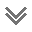

In [46]:
pc.content

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
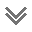

In [47]:
bs=BeautifulSoup(pc.content)
bs

In [49]:
bs.findAll('table')

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deat

In [59]:
heading = bs.table.thead
pd_heading=[]
for h in heading.findAll('th'):
  pd_heading.append(h.text)
pd_heading

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [67]:
pd_value=[]
for val in bs.table.tbody.findAll('tr'):
   row=[]
   for b in  val.findAll('td'):
     row.append(b.text)
   pd_value.append(row)
pd_value

[['',
  '\nNorth America\n',
  '66,525,119',
  '+1,818',
  '1,246,031',
  '+20',
  '50,353,257',
  '+2,146',
  '14,925,831',
  '24,352',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nAsia\n',
  '84,955,968',
  '+41,165',
  '1,256,971',
  '+379',
  '82,065,081',
  '+51,666',
  '1,633,916',
  '27,633',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '39,913,383',
  '+1,278',
  '1,192,447',
  '+11',
  '37,689,601',
  '+2,015',
  '1,031,335',
  '12,904',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nEurope\n',
  '88,929,788',
  '+114,014',
  '1,533,001',
  '+1,492',
  '75,451,034',
  '+145,550',
  '11,945,753',
  '22,303',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '\nAfrica\n',
  '9,882,005',
  '+7,336',
  '229,412',
  '+49',
  '8,750,101',
  '+7,075',
  '902,492',
  '2,210',
  

In [70]:
z=pd.DataFrame(pd_value,columns=pd_heading)
q=z

In [71]:
z.fillna(10)

#      Country,Other  ... New Deaths/1M pop Active Cases/1M pop
0         \nNorth America\n  ...                                      
1                  \nAsia\n  ...                                      
2         \nSouth America\n  ...                                      
3                \nEurope\n  ...                                      
4                \nAfrica\n  ...                                      
..   ...                ...  ...               ...                 ...
227  220              Samoa  ...                                      
228  221       Saint Helena  ...                                      
229  222         Micronesia  ...                                      
230  223              Tonga  ...                                      
231  224              China  ...                                     2

[232 rows x 22 columns]

In [72]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    232 non-null    object
 1   Country,Other        232 non-null    object
 2   TotalCases           232 non-null    object
 3   NewCases             232 non-null    object
 4   TotalDeaths          232 non-null    object
 5   NewDeaths            232 non-null    object
 6   TotalRecovered       232 non-null    object
 7   NewRecovered         232 non-null    object
 8   ActiveCases          232 non-null    object
 9   Serious,Critical     232 non-null    object
 10  Tot Cases/1M pop     232 non-null    object
 11  Deaths/1M pop        232 non-null    object
 12  TotalTests           232 non-null    object
 13  Tests/
1M pop
       232 non-null    object
 14  Population           232 non-null    object
 15  Continent            232 non-null    object
 16  1 Caseev

In [69]:
q.isna().sum()

Alfreds Futterkiste    0
Maria Anders           0
Germany                0
dtype: int64